# Problem Set: Advanced Part-of-Speech

In [2]:
import spacy, warnings; warnings.simplefilter('ignore')

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
%%time
import datetime as dt
import pandas as pd

all_hansard = pd.read_parquet("/scratch/group/oit_research_data/hansard/hansard_20191119.parquet")

CPU times: user 2min 9s, sys: 41.7 s, total: 2min 50s
Wall time: 2min 56s


In [5]:
all_hansard

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,Unnamed: 19
0,S1V0001P0_0,S1V0001P0,0,0,0,0,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,moved that Lord Walsingham be appointed chairm...,Lord Hawkesbury,None,HOUSE OF LORDS.,S1V0001P0I0024,11,False,Walsingham,PERSON,None
1,S1V0001P0_1,S1V0001P0,0,1,0,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"in seconding the motion, took an opportunity t...","The Lord Chancellor,",None,HOUSE OF LORDS.,S1V0001P0I0024,11,False,None,None,None
2,S1V0001P0_2,S1V0001P0,0,2,1,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"—The question was put, and the appointment for...","The Lord Chancellor,",None,HOUSE OF LORDS.,S1V0001P0I0024,11,False,None,None,None
3,S1V0001P0_3,S1V0001P0,0,3,0,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"then rose, and observed, that he was not in th...",Lord Walsingham,None,HOUSE OF LORDS.,S1V0001P0I0024,12,False,two,CARDINAL,None
4,S1V0001P0_4,S1V0001P0,0,4,1,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,He had to return his thanks to the House for t...,Lord Walsingham,None,HOUSE OF LORDS.,S1V0001P0I0024,12,False,"House,House,House","ORG,ORG,ORG",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71565564,S6CV0424P2_24427,S6CV0424P2,4001,1,1,10249070,1930316,2004-07-19,Speech Therapists,Uncategorized,[189367],Bob Spink,None,Written Ministerial Statements,S6CV0424P2I1101,1999W,False,189367,DATE,None
71565565,S6CV0424P2_24428,S6CV0424P2,4001,2,0,10249071,1930316,2004-07-19,Speech Therapists,Uncategorized,The information requested is not collected cen...,Mr. Hutton,None,Written Ministerial Statements,S6CV0424P2I1101,2000W,False,None,None,None
71565566,S6CV0424P2_24429,S6CV0424P2,4002,0,0,10249072,1930317,2004-07-19,Vancomycin-resistant Enterococcus,Uncategorized,To ask the Secretary of State for Health how m...,Mr. Iris Robinson,None,Written Ministerial Statements,S6CV0424P2I1101,2000W,False,"State for Health,each of the last 10 years","ORG,DATE",None
71565567,S6CV0424P2_24430,S6CV0424P2,4002,1,1,10249072,1930317,2004-07-19,Vancomycin-resistant Enterococcus,Uncategorized,[187444],Mr. Iris Robinson,None,Written Ministerial Statements,S6CV0424P2I1101,2000W,False,187444,DATE,None


In [6]:
all_hansard['speechdate'] = pd.to_datetime(all_hansard['speechdate'], errors = 'coerce')

hansard_1870 = all_hansard[(all_hansard['speechdate'] >= dt.datetime(1870,1,1)) & (all_hansard['speechdate'] <= dt.datetime(1879,12,31))]

In [7]:
hansard_1870

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,Unnamed: 19
4692304,S3V0199P0_0,S3V0199P0,0,0,0,342939,41076,1870-02-08,THE QUEEN'S SPEECH.,Uncategorized,delivered HER MAJESTY'S SPEECH to both Houses ...,THE LORD CHANCELLOR,None,"HOUSE OF LORDS,",S3V0199P0I0051,2,False,"SPEECH,Houses of Parliament","ORG,ORG",None
4692305,S3V0199P0_1,S3V0199P0,4,0,0,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,"My Lords, I rise to move that a humble Address...",THE MARQUESS OF HUNTLY,None,"HOUSE OF LORDS,",S3V0199P0I0054,7,False,My Lords,PERSON,None
4692306,S3V0199P0_2,S3V0199P0,4,1,1,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,I venture to ask your Lordships' indulgence in...,THE MARQUESS OF HUNTLY,None,"HOUSE OF LORDS,",S3V0199P0I0054,7,False,Lordships,ORG,None
4692307,S3V0199P0_3,S3V0199P0,4,2,2,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,I trust that any errors I may be guilty of may...,THE MARQUESS OF HUNTLY,None,"HOUSE OF LORDS,",S3V0199P0I0054,7,False,Lordships,ORG,None
4692308,S3V0199P0_4,S3V0199P0,4,3,3,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,I am sure your Lordships will have heard with ...,THE MARQUESS OF HUNTLY,None,"HOUSE OF LORDS,",S3V0199P0I0054,7,False,"Lordships,Majesty","ORG,PRODUCT",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822719,S3V0249P0_13044,S3V0249P0,10,26,17,445135,55124,1879-08-15,ROYAL COMMISSIONS—REPORTS AND EVIDENCE. —QUEST...,Uncategorized,Gentleman may be assured that no undue partial...,MR. GOSCHEN,None,"HOUSE OF COMMONS,",S3V0249P0I0548,1039,False,Gentleman,ORG,None
5822720,S3V0249P0_13045,S3V0249P0,11,0,0,445136,55125,1879-08-15,OFFENSIVE PRINTS. —QUESTION.,Uncategorized,asked the Secretary of State for the Home De- ...,SIR PATRICK O'BRIEN,None,"HOUSE OF COMMONS,",S3V0249P0I0548,1039,False,"State,the last few weeks,London","ORG,DATE,GPE",None
5822721,S3V0249P0_13046,S3V0249P0,11,1,0,445137,55125,1879-08-15,OFFENSIVE PRINTS. —QUESTION.,Uncategorized,"Sir, in reference to a reply which I recently ...",MR. ASSHETON CROSS,None,"HOUSE OF COMMONS,",S3V0249P0I0548,1040,False,None,None,None
5822722,S3V0249P0_13047,S3V0249P0,11,2,1,445137,55125,1879-08-15,OFFENSIVE PRINTS. —QUESTION.,Uncategorized,I do not retract anything that I said on a for...,MR. ASSHETON CROSS,None,"HOUSE OF COMMONS,",S3V0249P0I0548,1040,False,None,None,None


In [8]:
del all_hansard

In [9]:
hansard_text = hansard_1870[['sentence_id','text']].copy()

In [10]:
hansard_text

,sentence_id,text
4692304,S3V0199P0_0,delivered HER MAJESTY'S SPEECH to both Houses ...
4692305,S3V0199P0_1,"My Lords, I rise to move that a humble Address..."
4692306,S3V0199P0_2,I venture to ask your Lordships' indulgence in...
4692307,S3V0199P0_3,I trust that any errors I may be guilty of may...
4692308,S3V0199P0_4,I am sure your Lordships will have heard with ...
...,...,...
5822719,S3V0249P0_13044,Gentleman may be assured that no undue partial...
5822720,S3V0249P0_13045,asked the Secretary of State for the Home De- ...
5822721,S3V0249P0_13046,"Sir, in reference to a reply which I recently ..."
5822722,S3V0249P0_13047,I do not retract anything that I said on a for...


In [11]:
hansard_text['parsed_text'] = list(nlp.pipe(hansard_text['text'], disable = ["ent"], batch_size=100))

In [12]:
hansard_text

,sentence_id,text,parsed_text
4692304,S3V0199P0_0,delivered HER MAJESTY'S SPEECH to both Houses ...,"(delivered, HER, MAJESTY, 'S, SPEECH, to, both..."
4692305,S3V0199P0_1,"My Lords, I rise to move that a humble Address...","(My, Lords, ,, I, rise, to, move, that, a, hum..."
4692306,S3V0199P0_2,I venture to ask your Lordships' indulgence in...,"(I, venture, to, ask, your, Lordships, ', indu..."
4692307,S3V0199P0_3,I trust that any errors I may be guilty of may...,"(I, trust, that, any, errors, I, may, be, guil..."
4692308,S3V0199P0_4,I am sure your Lordships will have heard with ...,"(I, am, sure, your, Lordships, will, have, hea..."
...,...,...,...
5822719,S3V0249P0_13044,Gentleman may be assured that no undue partial...,"(Gentleman, may, be, assured, that, no, undue,..."
5822720,S3V0249P0_13045,asked the Secretary of State for the Home De- ...,"(asked, the, Secretary, of, State, for, the, H..."
5822721,S3V0249P0_13046,"Sir, in reference to a reply which I recently ...","(Sir, ,, in, reference, to, a, reply, which, I..."
5822722,S3V0249P0_13047,I do not retract anything that I said on a for...,"(I, do, not, retract, anything, that, I, said,..."


In [13]:
from spacy.symbols import nsubj, nsubjpass, VERB

def extractPairs(spacy_doc_object):
    pairs = []
    for doc in spacy_doc_object['parsed_text']:
        for subject in doc:
            if subject.dep == nsubj or subject.dep == nsubjpass and subject.head.pos == VERB:
                extracted_pairs = subject.text, subject.head.lemma_
                concat_extracted_pairs = ' '.join(extracted_pairs)
                pairs.append(str(concat_extracted_pairs))
    return pairs

pairs = extractPairs(hansard_text)

In [14]:
pairs[:30]

['I rise',
 'Address present',
 'I venture',
 'I undertake',
 'I trust',
 'errors lay',
 'I be',
 'Lordships look',
 'I be',
 'Lordships hear',
 'I be',
 'she suffer',
 'which make',
 'it impossible',
 'her execute',
 'relations be',
 'It be',
 'words refer',
 'which lead',
 'it be',
 'I regret',
 'settlement ratify',
 'which agree',
 'differences receive',
 'it be',
 'they adjust',
 'it gratify',
 'feeling exist',
 'it be',
 'countries be']

In [15]:
lowercase_pairs = [word.lower() for word in pairs]

In [16]:
lowercase_pairs[:30]

['i rise',
 'address present',
 'i venture',
 'i undertake',
 'i trust',
 'errors lay',
 'i be',
 'lordships look',
 'i be',
 'lordships hear',
 'i be',
 'she suffer',
 'which make',
 'it impossible',
 'her execute',
 'relations be',
 'it be',
 'words refer',
 'which lead',
 'it be',
 'i regret',
 'settlement ratify',
 'which agree',
 'differences receive',
 'it be',
 'they adjust',
 'it gratify',
 'feeling exist',
 'it be',
 'countries be']

## Filtering for Gendered Noun-Verb Pairs

In [41]:
male_words = ("man ,men ,male ,father ,boy ,husband ")
male_nouns = male_words.split(',')

In [42]:
female_words = ("Woman,Women,Mother,Girl,Female,Wife")
female_nouns = female_words.split(',')

In [89]:
import re

def extractPairs(pairs, word):
    regex = re.compile(word)
    gender = [word for word in lowercase_pairs if regex.match(word)]
    return gender

In [90]:
man = extractPairs(lowercase_pairs, 'man ')
men = extractPairs(lowercase_pairs, 'men ')
male = extractPairs(lowercase_pairs, 'male ')
father = extractPairs(lowercase_pairs, 'father ')
boy = extractPairs(lowercase_pairs, 'boy ')
husband = extractPairs(lowercase_pairs, 'husband ')

In [91]:
woman = extractPairs(lowercase_pairs, 'woman ')
women = extractPairs(lowercase_pairs, 'women ')
female = extractPairs(lowercase_pairs, 'female ')
mother = extractPairs(lowercase_pairs, 'mother ')
girl = extractPairs(lowercase_pairs, 'girl ')
wife = extractPairs(lowercase_pairs, 'wife ')

In [93]:
girl[:30]

['girl receive',
 'girl punish',
 'girl take',
 'girl be',
 'girl bring',
 'girl transfer',
 'girl find',
 'girl flee',
 'girl fine',
 'girl say',
 'girl approach',
 'girl be',
 'girl go',
 'girl fine',
 'girl be',
 'girl send',
 'girl risk',
 'girl be',
 'girl keep',
 'girl be',
 'girl be',
 'girl be',
 'girl be',
 'girl induce',
 'girl be',
 'girl have',
 'girl unsuitable',
 'girl sentence',
 'girl sentence',
 'girl graduate']

In [94]:
stopwords = ['right', 'hon', 'general', 'mr', 'shall', 'majesty', 'exchequer', 'address', 'motion', 'bill',
             'earl', 'friend', 'chancellor', 'sense', 'object', 'suppose', 'amidst', 'noble', 'lord', 'agree',
             'speech', 'kind', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
             'october', 'november', 'december', 'order', 'held', 'hold', 'assembly', '£', 'humble', 'about', 'above',
             'across', 'address', 'after', 'afterwards', 'again', 'against', 'agree', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'amidst', 'among', 'amongst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anything', 'anyway', 'anywhere', 'april', 'are', 'around', 'as', 'at', 'back', 'be', 'was',
             'becames', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
             'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'do',
             'could', 'did', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'either', 'else', 'elsewhere',
             'empty', 'enough', 'even', 'ever', 'everyone', 'everything', 'everywhere', 'except', 'few', 'first', 'for',
             'from', 'front', 'full', 'further', 'general', 'get', 'give', 'go', 'had', 'has', 'have', 'held', 'hence',
             'here', 'hereby', 'herein', 'hold', 'however', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself',
             'just', 'keep', 'kind', 'last', 'latter', 'least', 'less', 'made', 'make', 'many', 'me', 'meanwhile', 'might',
             'mine', 'more', 'most', 'mostly', 'move', 'much', 'must', 'name,' 'neither', 'never', 'nevertheless', 'next',
             'no', 'noble', 'nobody', 'none', 'nor', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'one', 'once',
             'only', 'onto', 'or', 'other', 'others', 'otherwise', 'out', 'over', 'own', 'part', 'perhaps', 'please', 'put',
             'quite', 'rather', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sense',
             'several', 'shall', 'should', 'show', 'side', 'since', 'so', 'some', 'someone', 'something', 'sometime',
             'still', 'such', 'suppose', 'take', 'than', 'that', 'the', 'then', 'there', 'thereby', 'therefore', 'these',
             'they', 'this', 'those', 'though', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'under',
             'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'when', 'whereby', 'whether', 'which', 'while', 'who', 'why', 'will', 'with', 'within',
             'without', 'would', 'yet', 'bright', 'mr.', 'hansard', 'lancashire', '[]', '£1', '000', 'russell', 'committee',
             'reading', 'learned', 'deal', 'time', 'royal', 'gentlemen', 'gentleman', 'year', 'years', 'affairs', 'affair',
             'academy', 'sir', 'thought', 'took', 'bring', 'brings', 'brought', 'forward', 'great', 'good', 'department',
             'treasury', 'second', 'take', 'taken', 'privy', 'member', 'robert', 'large', 'session', 'secretary', 'notice',
             'moment', 'think', 'believe', 'hope', 'ask', 'hear', 'beg', 'support', 'state', 'find', 'admit', 'wish',
             'refer', 'reply', 'know', 'feel', 'propose', 'understand', 'let', 'allow', 'like', 'receive', 'consider',
             'begin', 'tell', 'like', 'send', 'ought', 'come', 'intend', 'add', 'want', 'stand', 'suggest', 'remind',
             'use', 'mean', 'suggest']

In [131]:
tokens_joined_male = []

for pair in man:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))

for pair in men:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))
    
for pair in male:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))

for pair in father:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))

for pair in boy:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))
    
for pair in husband:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_male.append(str(tokens))

In [136]:
tokens_joined_male[:20]

['man try',
 'man appear',
 'man',
 'man dare',
 'man',
 'man protest',
 'man',
 'man',
 'man',
 'man maintain',
 'man spend',
 'man',
 'man undertake',
 'man declare',
 'man enter',
 'man lose',
 'man',
 'man deem',
 'man bandy',
 'man']

In [137]:
tokens_joined_female = []

for pair in woman:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))

for pair in women:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))
    
for pair in female:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))

for pair in mother:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))

for pair in girl:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))
    
for pair in wife:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined_female.append(str(tokens))

In [138]:
tokens_joined_female[:30]

['woman',
 'woman',
 'woman dress',
 'woman deliver',
 'woman',
 'woman',
 'woman marry',
 'woman marry',
 'woman separate',
 'woman',
 'woman marry',
 'woman advocate',
 'woman',
 'woman live',
 'woman concern',
 'woman',
 'woman release',
 'woman attend',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman dispose',
 'woman',
 'woman happen',
 'woman preach',
 'woman',
 'woman']

In [139]:
def removeStopWords(pairs):
    keep_pairs = []
    for pair in pairs:
        tokens = pair.split(" ")
        tokens_filtered = [word for word in tokens if not word in stopwords]
        joined_tokens = " ".join(tokens_filtered)
        if len(tokens_filtered) == 2: # if string is length of two
            keep_pairs.append(str(joined_tokens)) # keep the string
    return keep_pairs



In [142]:
male_no_stopwords = removeStopWords(male)
men_no_stopwords = removeStopWords(men)
man_no_stopwords = removeStopWords(man)
father_no_stopwords = removeStopWords(father)
husband_no_stopwords = removeStopWords(husband)
boy_no_stopwords = removeStopWords(boy)

In [141]:
men_no_stopwords[:30]

['men attack',
 'men fill',
 'men spare',
 'men judge',
 'men represent',
 'men religious',
 'men speak',
 'men engage',
 'men naturalize',
 'men enter',
 'men dispense',
 'men prepare',
 'men verse',
 'men fit',
 'men employ',
 'men appoint',
 'men differ',
 'men rush',
 'men appoint',
 'men sympathize',
 'men exercise',
 'men afford',
 'men discharge',
 'men acquit',
 'men trust',
 'men look',
 'men attract',
 'men retire',
 'men concern',
 'men employ']

In [143]:
female_no_stopwords = removeStopWords(female)
women_no_stopwords = removeStopWords(women)
woman_no_stopwords = removeStopWords(woman)
mother_no_stopwords = removeStopWords(mother)
girl_no_stopwords = removeStopWords(girl)
wife_no_stopwords = removeStopWords(wife)

In [145]:
girl_no_stopwords[:30]

['girl punish',
 'girl transfer',
 'girl flee',
 'girl fine',
 'girl approach',
 'girl fine',
 'girl risk',
 'girl induce',
 'girl unsuitable',
 'girl sentence',
 'girl sentence',
 'girl graduate',
 'girl remain',
 'girl examine',
 'girl prosecute',
 'girl forfeit',
 'girl examine',
 'girl leave',
 'girl surround',
 'girl expel',
 'girl run',
 'girl expel',
 'girl describe',
 'girl permit',
 'girl engage',
 'girl sustain',
 'girl engage']

In [147]:
def countWords(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict      

In [150]:
male_dictionary = countWords(male_no_stopwords)
men_dictionary = countWords(men_no_stopwords)
man_dictionary = countWords(man_no_stopwords)
husband_dictionary = countWords(husband_no_stopwords)
boy_dictionary = countWords(boy_no_stopwords)
father_dictionary = countWords(father_no_stopwords)

In [162]:
male_dictionary = {**male_dictionary, **men_dictionary, **man_dictionary, **husband_dictionary,**boy_dictionary,**father_dictionary}

In [163]:
female_dictionary = countWords(female_no_stopwords)
women_dictionary = countWords(women_no_stopwords)
woman_dictionary = countWords(woman_no_stopwords)
wife_dictionary = countWords(wife_no_stopwords)
girl_dictionary = countWords(girl_no_stopwords)
mother_dictionary = countWords(mother_no_stopwords)

In [164]:
female_dictionary = {**female_dictionary, **women_dictionary, **woman_dictionary, **wife_dictionary,**girl_dictionary,**mother_dictionary}

In [165]:
for kv in list(male_dictionary)[:30]:
    print(kv,  male_dictionary[kv])

male land 1
men attack 4
men fill 9
men spare 6
men judge 2
men represent 10
men religious 2
men speak 20
men engage 53
men naturalize 1
men enter 87
men dispense 1
men prepare 5
men verse 3
men fit 23
men employ 64
men appoint 44
men differ 13
men rush 2
men sympathize 1
men exercise 8
men afford 4
men discharge 33
men acquit 5
men trust 7
men look 22
men attract 7
men retire 6
men concern 11
men regret 4


In [166]:
for kv in list(female_dictionary)[:30]:
    print(kv,  female_dictionary[kv])

female employ 1
female succeed 1
female appear 1
women seek 4
women employ 39
women emigrate 1
women exist 1
women inveigle 1
women outrage 4
women entitle 14
women marry 1
women instruct 1
women possess 14
women prefer 2
women summon 1
women enfranchise 14
women share 4
women pay 8
women escape 1
women complain 5
women charge 5
women form 8
women engage 8
women fit 4
women obtain 7
women political 1
women deteriorate 2
women care 9
women vote 27
women act 2


In [167]:
male_pronoun_verb_counts = pd.DataFrame(male_dictionary.items(),columns = ['Pair','Count'])

In [168]:
male_pronoun_verb_counts

,Pair,Count
0,male land,1
1,men attack,4
2,men fill,9
3,men spare,6
4,men judge,2
...,...,...
2024,father prosecute,1
2025,father sentence,1
2026,father manifest,1
2027,father enjoy,1


In [169]:
female_pronoun_verb_counts = pd.DataFrame(female_dictionary.items(),columns = ['Pair','Count'])

In [170]:
female_pronoun_verb_counts

,Pair,Count
0,female employ,1
1,female succeed,1
2,female appear,1
3,women seek,4
4,women employ,39
...,...,...
637,mother wear,1
638,mother reduce,1
639,mother set,1
640,mother drive,1


In [171]:
male_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=False)

In [172]:
female_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=False)

In [173]:
male_pronoun_verb_counts

,Pair,Count
984,man pay,115
207,men enlist,91
10,men enter,87
902,man try,71
15,men employ,64
...,...,...
869,men mention,1
868,men ascertain,1
867,men drop,1
866,men savage,1


In [174]:
female_pronoun_verb_counts

,Pair,Count
4,women employ,39
28,women vote,27
308,woman marry,21
81,women suffer,20
88,women desire,17
...,...,...
277,women concern,1
276,women preclude,1
275,women conceal,1
274,women promote,1


In [189]:
top_male_pronoun_verb_counts = male_pronoun_verb_counts[:50].copy()
top_female_pronoun_verb_counts = female_pronoun_verb_counts[:50].copy()

In [190]:
top_male_pronoun_verb_counts

,Pair,Count
984,man pay,115
207,men enlist,91
10,men enter,87
902,man try,71
15,men employ,64
1021,man vote,64
987,man die,64
943,man convict,56
910,man enter,53
8,men engage,53


In [191]:
top_female_pronoun_verb_counts

,Pair,Count
4,women employ,39
28,women vote,27
308,woman marry,21
81,women suffer,20
88,women desire,17
15,women enfranchise,14
9,women entitle,14
12,women possess,14
38,women represent,14
322,woman entitle,13


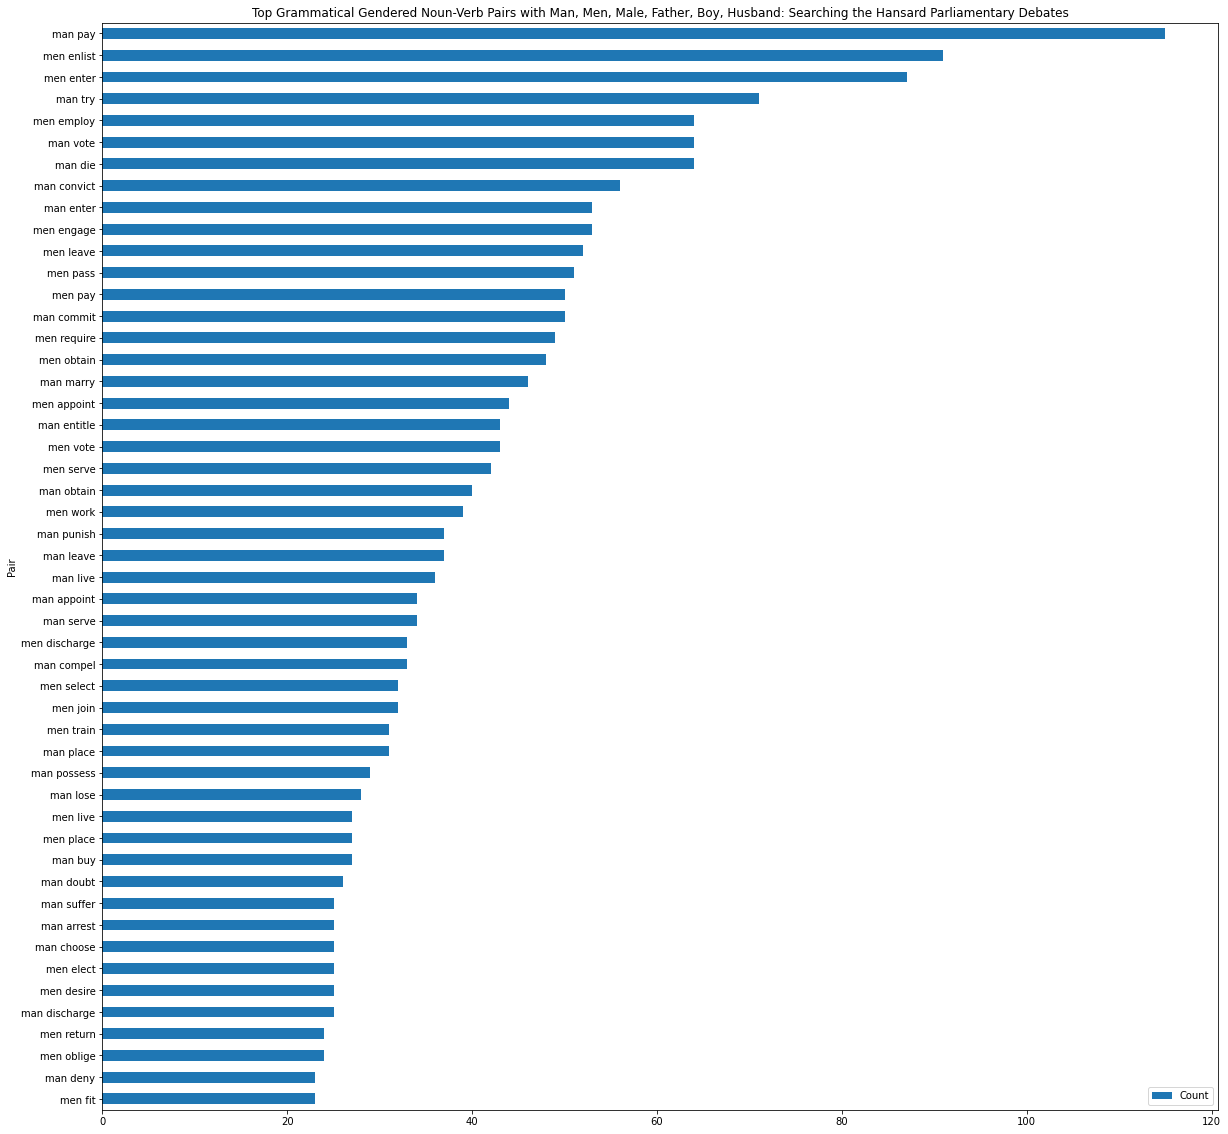

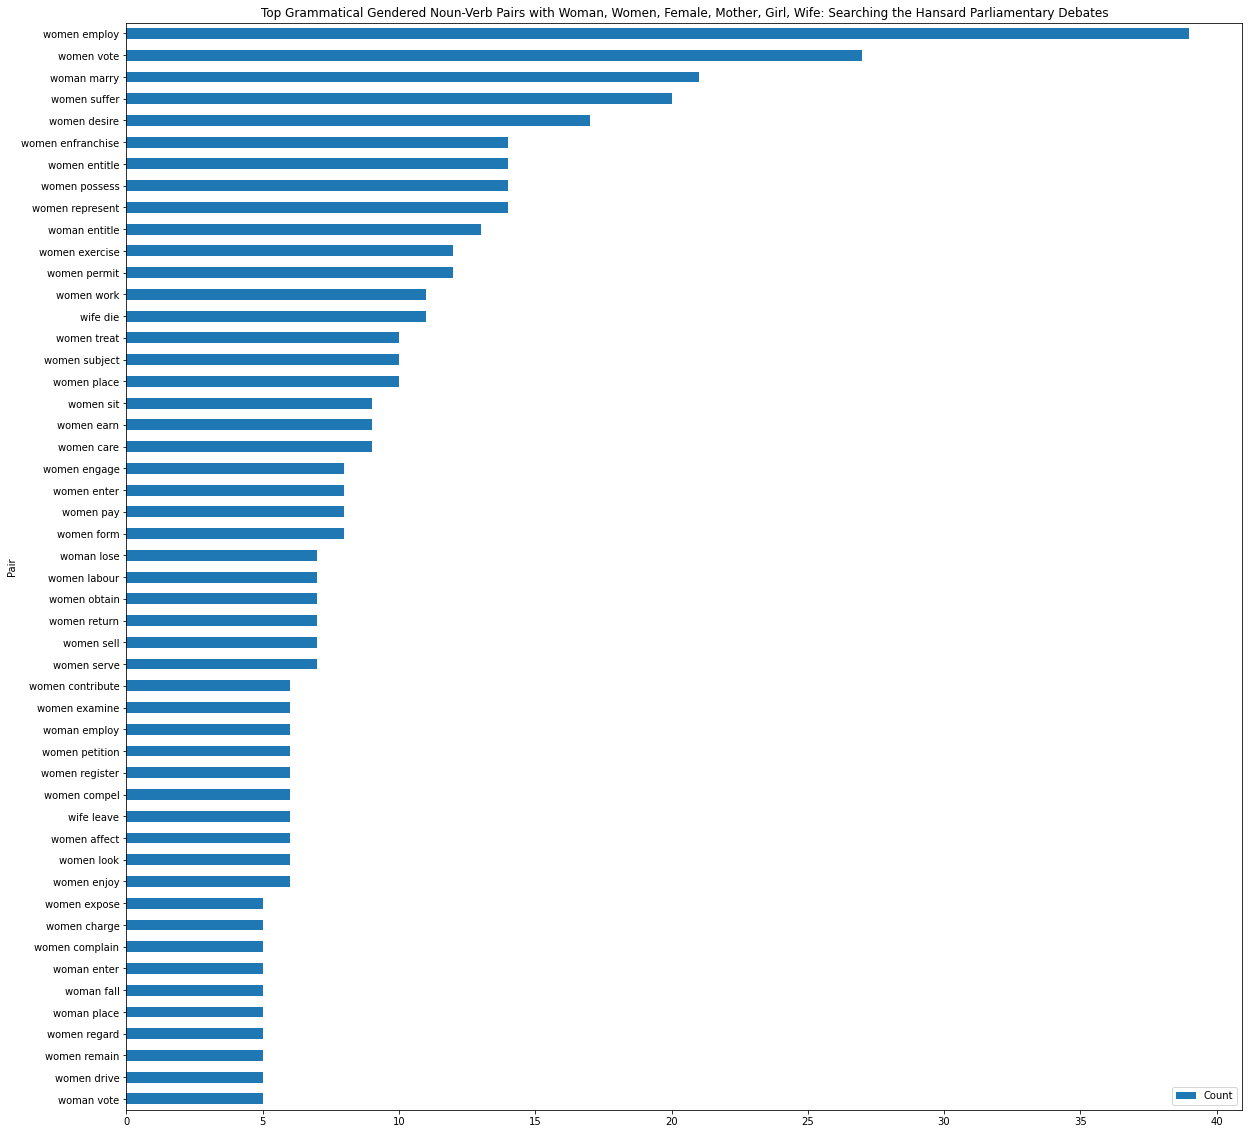

In [192]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = [20, 20]

top_male_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=True)

top_male_pronoun_verb_counts.plot.barh(x = "Pair", y = "Count",
            title = "Top Grammatical Gendered Noun-Verb Pairs with Man, Men, Male, Father, Boy, Husband: Searching the Hansard Parliamentary Debates")

# sort the pairs for visualization
top_female_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=True)

# render visualization
top_female_pronoun_verb_counts.plot.barh(x = "Pair", y = "Count",
            title = "Top Grammatical Gendered Noun-Verb Pairs with Woman, Women, Female, Mother, Girl, Wife: Searching the Hansard Parliamentary Debates")